IMPORT THE REQUIRED LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT THE CSV FILE 

In [67]:
df=pd.read_csv('fifa_eda.csv')

CHECK FOR NULL VALUES AND DROP THEM

In [52]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [53]:
df.shape

(18207, 18)

In [68]:
df.dropna(inplace=True)

In [69]:
df.shape

(17907, 18)

TOP 10 PLAYERS BY THEIR RATINGS

In [8]:
df.sort_values('Overall',ascending=False)[['Name','Overall']].head(10)

,Name,Overall
0,L. Messi,94
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91
6,L. Modrić,91
7,L. Suárez,91
8,Sergio Ramos,91
12,D. Godín,90


BOTTOM 10 PLAYERS BY THEIR RATINGS

In [9]:
df.sort_values('Overall',ascending=True)[['Name','Overall']].head(10)

,Name,Overall
18206,G. Nugent,46
18186,Zhang Yufeng,47
18187,C. Ehlich,47
18188,L. Collins,47
18189,A. Kaltner,47
18190,L. Watkins,47
18191,J. Norville-Williams,47
18192,S. Squire,47
18193,N. Fuentes,47
18194,J. Milli,47


In [10]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0


NO. OF PLAYERS BY COUNTRY AND PLOT BAR GRAPH , 
WE CAN SEE THAT MAJORITY OF THE PLAYERS ARE FROM ENGLAND,GERMANY AND SPAIN

In [11]:
by_country=df['Nationality'].value_counts().head(10)
by_country

England        1655
Germany        1195
Spain          1071
Argentina       935
France          910
Brazil          824
Italy           699
Colombia        615
Japan           475
Netherlands     452
Name: Nationality, dtype: int64

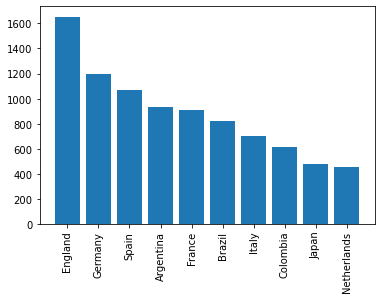

In [12]:
plt.bar(by_country.index,by_country.values)
plt.xticks(rotation=90);

NO. OF PLAYERS BY CLUB THEY REPRESENT AND PLOT BAR GRAPH , TOP CLUBS ARE AS FOLLOWS

In [13]:
by_club=df['Club'].value_counts().head(10)
by_club

FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
RC Celta                   33
Rayo Vallecano             33
Fortuna Düsseldorf         33
Valencia CF                33
CD Leganés                 33
Name: Club, dtype: int64

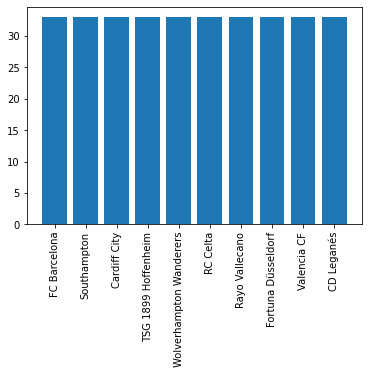

In [14]:
plt.bar(by_club.index,by_club.values)
plt.xticks(rotation=90);

NO. OF PLAYERS BY POSITION THEY PLAY IN AND PLOT BAR GRAPH , WE CAN SEE THAT MAJORITY OF THE PLAYERS ARE STRIKERS FOLLOWED BY GOALKEEPER AND CENTER BACK .

In [15]:
by_position=df['Position'].value_counts()

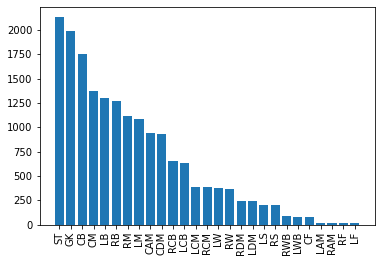

In [16]:
plt.bar(by_position.index,by_position.values)
plt.xticks(rotation=90);

NO. OF PLAYERS BY THEIR PREFERRED FOOT AND PLOT PIE CHART , WE CAN SEE THAT 77% OF PLAYER PREFER RIGHT FOOT

<AxesSubplot:ylabel='Preferred Foot'>

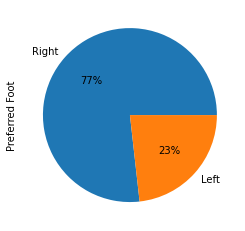

In [17]:
df['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.0f%%')

HISTOGRAM TO CHECK HOW PLAYER'S AGE IS DISTRIBUTED, WE CAN SEE THAT MOST OF THE PLAYERS ARE BETWEEN 21-26

<AxesSubplot:xlabel='Age', ylabel='Count'>

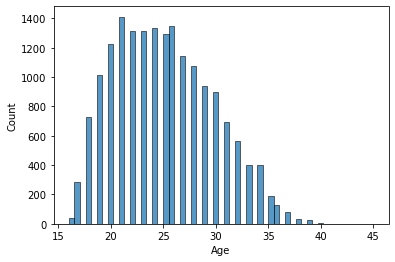

In [76]:
sns.histplot(df["Age"])

In [18]:
import warnings
warnings.filterwarnings('ignore')

SCATTERPLOT TO FIND THE CORRELAION BETWEEN RATING AND WAGE, AS WE CAN SEE HERE WAGE INCREASES EXPONENTIALLY AS THE RATINGS INCREASE

<AxesSubplot:xlabel='Overall', ylabel='Wage'>

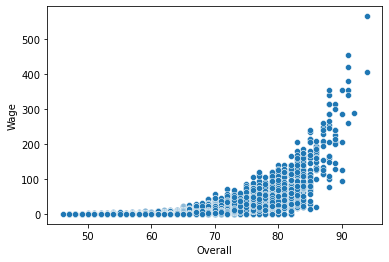

In [19]:
sns.scatterplot(df['Overall'],df['Wage'])

SCATTERPLOT TO FIND THE CORRELAION BETWEEN RATING AND VALUE, AS WE CAN SEE HERE VALUE INCREASES EXPONENTIALLY AS THE RATINGS INCREASE

<AxesSubplot:xlabel='Overall', ylabel='Value'>

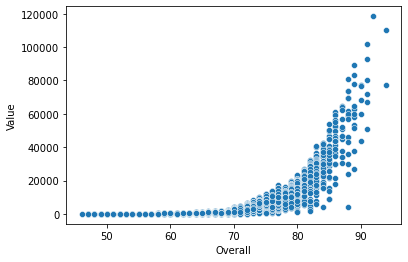

In [20]:
sns.scatterplot(df['Overall'],df['Value'])

SCATTERPLOT TO FIND THE CORRELAION BETWEEN RATING AND AGE, AS WE CAN SEE HERE THERE IS NO RELATION BETWEEN THEM

<AxesSubplot:xlabel='Overall', ylabel='Age'>

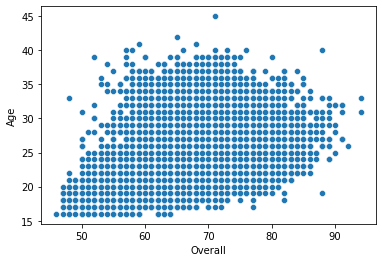

In [21]:
sns.scatterplot(df['Overall'],df['Age'])

In [22]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0


CALCUATING AVERAGE RATING AGE WISE AND PLOT BAR CHART, WE CAN SEE THAT RATING INCREASES SLOWLY AS THE AGE PASSES AND REACHES MAX. AROUND 30-32 THEN GRADUALLY DECREASES

In [23]:
agewise_rating=df.groupby('Age').mean()['Overall']

Text(0, 0.5, 'Rating')

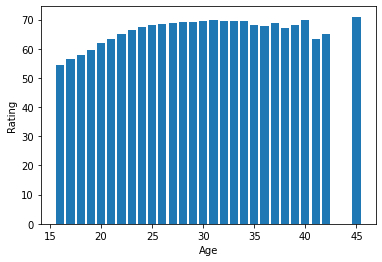

In [24]:
plt.bar(agewise_rating.index,agewise_rating.values)
plt.xlabel('Age')
plt.ylabel('Rating')

CALCUATING AVERAGE WAGE AGE WISE AND PLOT BAR CHART, WE CAN SEE THAT WAGES ARE NORMALLY DISTRIBUTED AND MAX. AROUND 31.

In [25]:
agewise_wage=df.groupby('Age').mean()['Wage']

Text(0, 0.5, 'Wage')

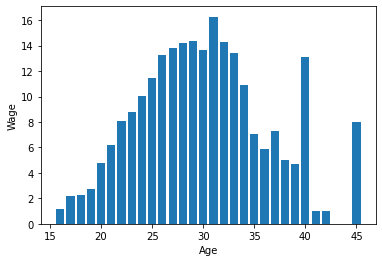

In [26]:
plt.bar(agewise_wage.index,agewise_wage.values)
plt.xlabel('Age')
plt.ylabel('Wage')

BOXPLOT TO FIND HOW THE OVERALL RATING IS DISTRIBUTED, WE CAN SEE THAT MEAN VALUE IS AROUND 66 AND MOST OF THE VALUES LIE BETWEEN 50 TO 84

<AxesSubplot:xlabel='Overall'>

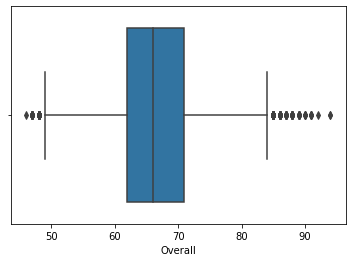

In [27]:
sns.boxplot(x="Overall",data=df)

BOXPLOT TO FIND HOW AGE IS DISTRIBUTED, WE CAN SEE THAT MEAN VALUE IS AROUND 25 AND MOST OF THE VALUES LIE BETWEEN 20 TO 30

<AxesSubplot:xlabel='Age'>

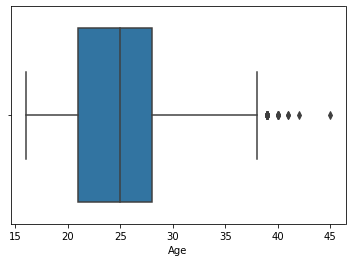

In [28]:
sns.boxplot(x="Age",data=df)

In [72]:
df.head(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

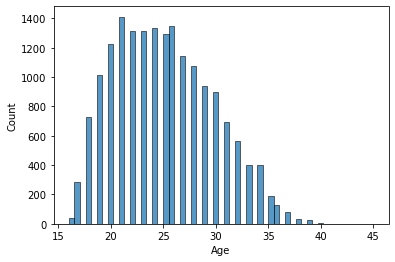